<a href="https://colab.research.google.com/github/IdajiliJohnOjochegbe/Iris-Flower-Classification/blob/main/Iris%20Flower%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.4-py2.py3-none-any.whl size=265375577 sha256=a6408e96d0c45f783e082e7b88294f23eb113b3d272413dc347eb2ef8ecb3e6e
  Stored in directory: /root/.cache/pip/wheels/4d/a6/47/8bfeb1026fd65cb8630beb74d8e3bec844f572cf4f336fdd56
Successfully built h2o


In [ ]:
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get(url)
with open("iris.csv", "wb") as file:
    file.write(response.content)


In [ ]:
import h2o
h2o.init()

# Load the dataset
data_path = "iris.csv"
data = h2o.import_file(data_path, header=0)

# Print a summary of the dataset
data.summary()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps02yik3n
  JVM stdout: /tmp/tmps02yik3n/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps02yik3n/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,12 hours and 44 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_kk5xt9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


<ipython-input-4-354c5c58fbff>:9: H2ODeprecationWarning: ``summary()`` is deprecated, please use ``show_summary()`` or ``get_summary()`` instead
  data.summary()


,C1,C2,C3,C4,C5
type,real,real,real,real,enum
mins,4.3,2.0,1.0,0.1,
mean,5.843333333333333,3.053999999999999,3.758666666666667,1.1986666666666665,
maxs,7.9,4.4,6.9,2.5,
sigma,0.8280661279778637,0.43359431136217375,1.764420419952262,0.7631607417008414,
zeros,0,0,0,0,
missing,0,0,0,0,0
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

# Initialize H2O
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,52 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,12 hours and 44 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_kk5xt9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Load the dataset
data_path = "iris.csv"
data = h2o.import_file(data_path, header=0)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Split the data into training and testing sets
train, test = data.split_frame(ratios=[0.8], seed=1234)


In [ ]:
# Identify predictors and response
predictors = data.columns[:-1]
response = data.columns[-1]

# Convert the response column to a categorical variable
data[response] = data[response].asfactor()


In [ ]:
# Initialize the model
rf_model = H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=10)

# Train the model
rf_model.train(x=predictors, y=response, training_frame=train)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1720601716560_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 150                         19262                  1            7            3.32          2             13            5.56667

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.029342170330019478
RMSE: 0.17129556424501913
LogLoss: 0.11311300527637383
Mean Per-Class Error: 0.03794326241134752
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error      Rate
-------------  -----------------  ----------------  ---------  -------
36             0                  0                 0          0 / 36
0              38                 2                 0.05       2 / 40
0              3                  44                0.0638298  3 / 47
36             41                 46                0.0406504  5 / 123

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.95935
2    1
3    1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.03555912381014475
RMSE: 0.18857126984284947
LogLoss: 0.14360175723298527
Mean Per-Class Error: 0.030851063829787233
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error      Rate
-------------  -----------------  ----------------  ---------  -------
36             0                  0                 0          0 / 36
0              38                 2                 0.05       2 / 40
0              2                  45                0.0425532  2 / 47
36             40                 47                0.0325203  4 / 123

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.96748
2    1
3    1

Cross-Validation Metrics Summary: 
                         mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
-----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
accuracy                 0.968858   0.0406132  0.933333      0.923077      0.909091      1             1             1             1             0.923077      1             1
aic                      nan        0          nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
auc                      nan        0          nan           nan           nan           nan           nan           nan           nan           nan           nan           nan
err                      0.0311422  0.0406132  0.0666667     0.0769231     0.0909091     0             0             0             0             0.0769231     0             0
err_count                0.4        0.516398   1             1             1             0  

In [ ]:
# Make predictions
predictions = rf_model.predict(test)

# Evaluate the model performance
performance = rf_model.model_performance(test)
print(performance)


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.03563740436573473
RMSE: 0.18877871798943527
LogLoss: 0.10183161842923834
Mean Per-Class Error: 0.14444444444444446
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error      Rate
-------------  -----------------  ----------------  ---------  ------
14             0                  0                 0          0 / 14
0              9                  1                 0.1        1 / 10
0              1                  2   

In [ ]:
# Print the variable importance
print(rf_model.varimp())


[('C4', 1631.6531982421875, 1.0, 0.4625642910504893), ('C3', 1535.5509033203125, 0.9411012738335525, 0.43531984353752956), ('C1', 271.0754089355469, 0.1661354319824714, 0.07684831831333867), ('C2', 89.12895965576172, 0.05462494098119755, 0.025267547098642464)]


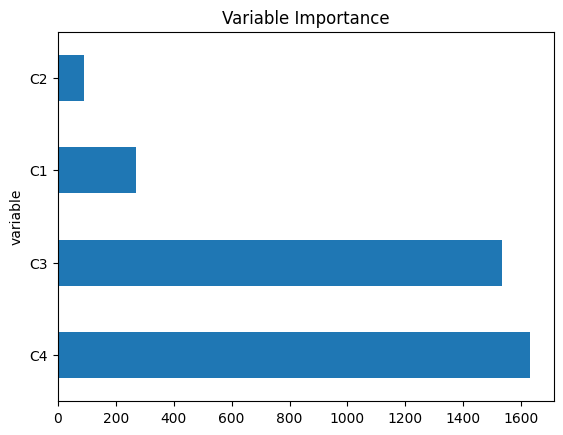

In [ ]:
import matplotlib.pyplot as plt

# Plot the variable importance
varimp = rf_model.varimp(use_pandas=True)
varimp.plot(kind="barh", x="variable", y="relative_importance", legend=False)
plt.title("Variable Importance")
plt.show()


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


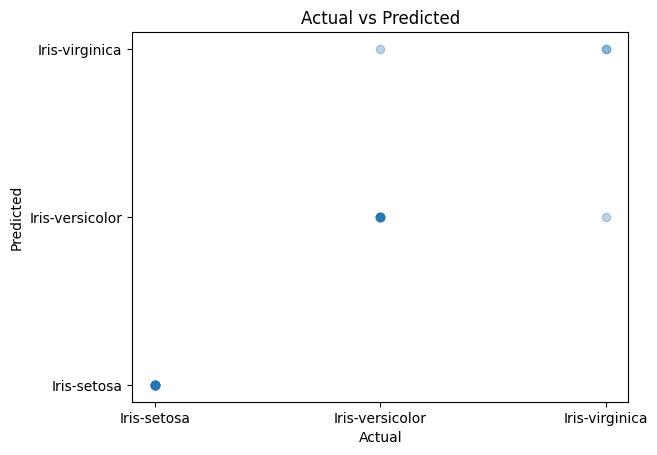

In [ ]:
# Plot predictions vs. actual
import pandas as pd

preds = predictions.as_data_frame()
test_df = test.as_data_frame()

plt.scatter(test_df[response], preds['predict'], alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


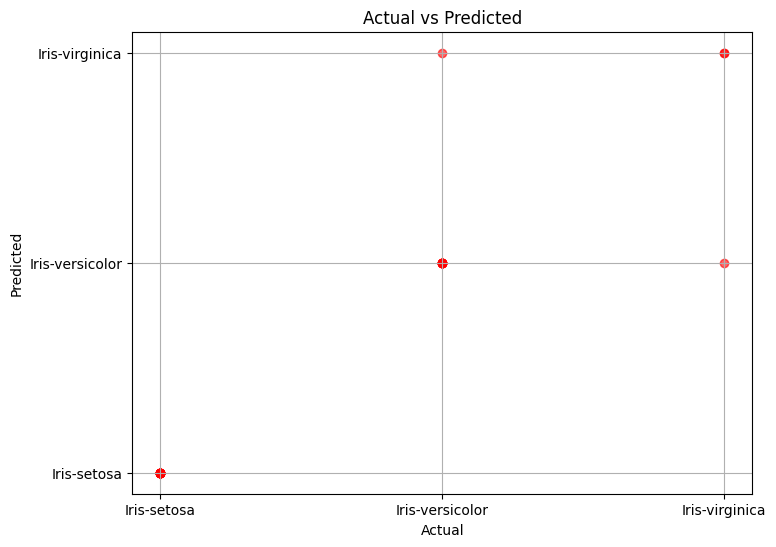

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert predictions to a pandas DataFrame
preds = predictions.as_data_frame()
test_df = test.as_data_frame()

# Combine the actual and predicted values into a single DataFrame
results = pd.concat([test_df[response], preds['predict']], axis=1)
results.columns = ['Actual', 'Predicted']

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(results['Actual'], results['Predicted'], alpha=0.6, color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Extract actual and predicted values
actual = results['Actual']
predicted = results['Predicted']

# Calculate accuracy metrics
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, average='macro')
recall = recall_score(actual, predicted, average='macro')
f1 = f1_score(actual, predicted, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.93
Precision: 0.86
Recall: 0.86
F1 Score: 0.86


# using AutoML

In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Load dataset
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Load dataset
data_path = "iris.csv"
data = h2o.import_file(data_path, header=0)

# Split data into train and test sets
train, test = data.split_frame(ratios=[0.8])

# Define response and predictor variables
response = 'C5'
predictors = data.columns[:-1]  # assuming the last column is the target

# Train AutoML model
aml = H2OAutoML(max_runtime_secs=3600, seed=1)
aml.train(x=predictors, y=response, training_frame=train)

# View the AutoML leaderboard
lb = aml.leaderboard
print(lb)

# Get the best model
best_model = aml.leader

# Predict on the test set
preds = best_model.predict(test)


# Split data into train and test sets
train, test = data.split_frame(ratios=[0.8])

# Define response and predictor variables
response = 'C5'  # assuming 'C5' is the target column
predictors = data.columns[:-1]  # assuming the last column is the target

# Train AutoML model
aml = H2OAutoML(max_runtime_secs=3600, seed=1)
aml.train(x=predictors, y=response, training_frame=train)

# View the AutoML leaderboard
lb = aml.leaderboard
print(lb)

# Get the best model
best_model = aml.leader

# Predict on the test set
preds = best_model.predict(test)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,39 mins 47 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,13 hours and 23 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_kk5xt9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.167 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,39 mins 47 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,13 hours and 23 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_kk5xt9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.167 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███
09:35:20.583: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 118.0.

████████████████████████████████████████████████████████████| (done) 100%
model_id                                                  mean_per_class_error    logloss      rmse        mse
DeepLearning_grid_1_AutoML_1_20240710_93509_model_36                0.00757576  0.0445526  0.10436   0.0108911
DeepLearning_grid_1_AutoML_1_20240710_93509_model_14                0.00757576  0.0535486  0.113602  0.0129054
DeepLearning_grid_1_AutoML_1_20240710_93509_model_5                 0.00757576  0.0612199  0.111222  0.0123703
StackedEnsemble_AllModels_3_AutoML_1_20240710_93509                 0.0151515   0.188064   0.198442  0.0393793
DeepLearning_grid_1_AutoML_1_20240710_93509_model_1                 0.0151515   0.0635365  0.131304 

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert H2O frame to pandas dataframe for easier manipulation
test_df = test.as_data_frame()
preds_df = preds.as_data_frame()

# Combine the actual and predicted values
results = pd.concat([test_df[response], preds_df['predict']], axis=1)
results.columns = ['Actual', 'Predicted']

# Calculate accuracy metrics
accuracy = accuracy_score(results['Actual'], results['Predicted'])
precision = precision_score(results['Actual'], results['Predicted'], average='macro')
recall = recall_score(results['Actual'], results['Predicted'], average='macro')
f1 = f1_score(results['Actual'], results['Predicted'], average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.93
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


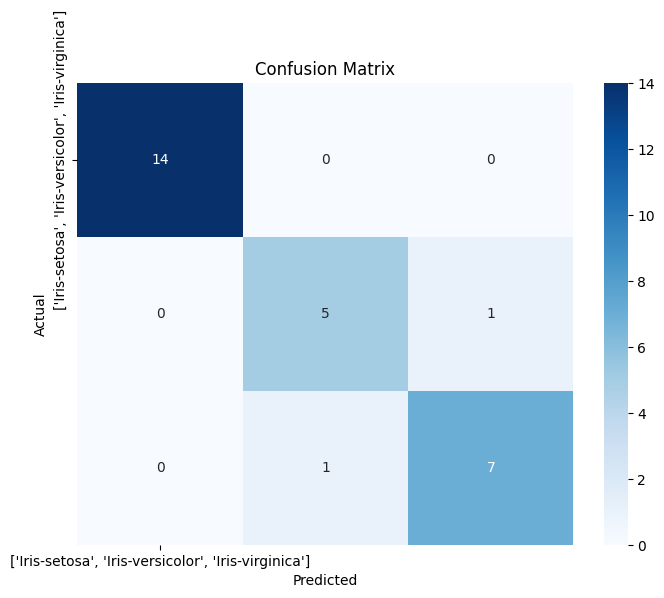

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(results['Actual'], results['Predicted'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test[response].levels(), yticklabels=test[response].levels())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
